In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import ceil

In [2]:
df = pd.read_csv('data/fires.csv')

In [15]:
month_to_idx = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

day_to_idx = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7
}

# categorical value to numerical
df['month'] = df['month'].map(month_to_idx)
df['day'] = df['day'].map(day_to_idx)


# normalise
df.loc[df['FFMC'] < 60, 'FFMC'] = 60
df.loc[df['ISI'] > 25, 'ISI'] = 25
df.loc[df['rain'] > 1.8, 'rain'] = 1.8
df['FFMC_std'] = (df['FFMC'] - df['FFMC'].mean()) / df['FFMC'].std()
df['ISI_std'] = (df['ISI'] - df['ISI'].mean()) / df['ISI'].std()
df['rain_std'] = (df['rain'] - df['rain'].mean()) / df['rain'].std()

In [16]:
df.describe()
# df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,FFMC_std,ISI_std,rain_std
count,517.000000,517.000000,0.0,0.0,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02,5.170000e+02,5.170000e+02
mean,4.669246,4.299807,NaN,NaN,90.755899,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,-2.535689e-15,2.061536e-17,6.871787e-18
std,2.313778,1.229900,NaN,NaN,4.478937,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,2.000000,NaN,NaN,60.000000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,-6.866785e+00,-1.978662e+00,-7.319742e-02
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,-1.241141e-01,-5.530598e-01,-7.319742e-02
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.884600e-01,-1.363453e-01,-7.319742e-02
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,4.787074e-01,3.900308e-01,-7.319742e-02
max,9.000000,9.000000,NaN,NaN,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.215489e+00,1.032538e+01,2.155141e+01


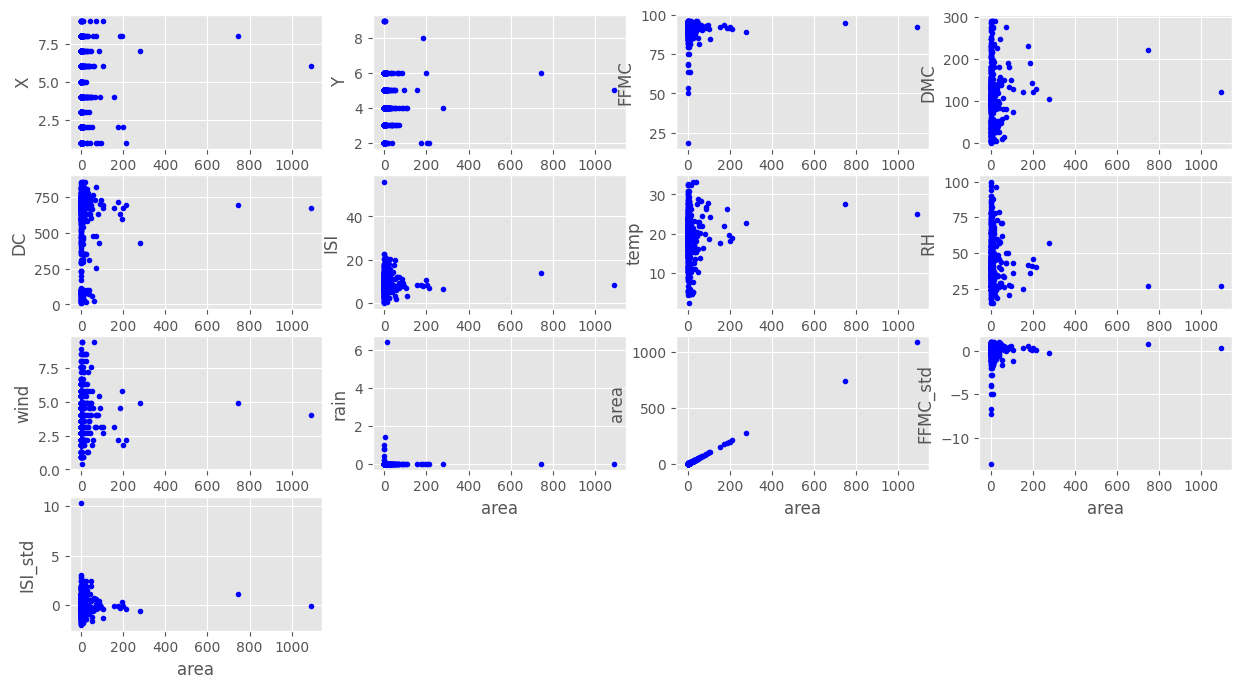

In [10]:
plt.style.use('ggplot')   # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 8)

fires_attributes = df.columns.values.tolist()
number_of_columns = len(fires_attributes)

attributes = [0, 1] + list(range(4, number_of_columns - 1))
n_cols = 4
n_rows = int(ceil(len(attributes) / n_cols))
fig = plt.figure()
idx = 1
for attr in attributes:
    plt.subplot(n_rows, n_cols, idx)
    plt.plot(df['area'], df[fires_attributes[attr]], 'b.')
#    seaborn.regplot(x = fires['area'], y = fires[fires_attributes[attr]], 
#                    scatter = True, color = 'b', data = fires)
    plt.xlabel('area')
    plt.ylabel(fires_attributes[attr])
    idx += 1

plt.show()

In [8]:
df.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


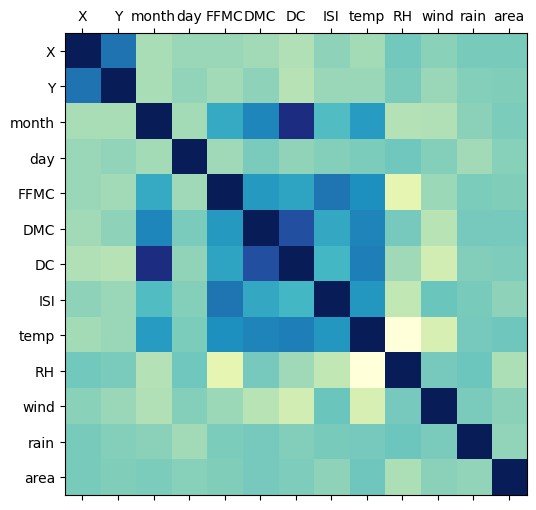

In [9]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(corr, cmap = 'YlGnBu')
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);